# This notebook will download and preprocess all the necessary data for analysis. 
## A guiding principle will be to use datasets and techniques that can be extended to anywhere 

## Global DEM Data

In [20]:
!mkdir data/elevation

In [11]:
!curl -k https://srtm.csi.cgiar.org/wp-content/uploads/files/srtm_5x5/TIFF/srtm_54_08.zip --output data/elevation.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.5M  100 19.5M    0     0  1318k      0  0:00:15  0:00:15 --:--:-- 1505k


In [23]:
!unzip data/elevation.zip -d  data/elevation/

Archive:  data/elevation.zip
  inflating: data/elevation/readme.txt  
  inflating: data/elevation/srtm_54_08.hdr  
  inflating: data/elevation/srtm_54_08.tfw  
  inflating: data/elevation/srtm_54_08.tif  


In [24]:
!cat data/elevation/readme.txt

## Convert DEM To Watershed Data

In [53]:
s = """- defaults/linux-64::mpfr==4.0.1=hdf1c602_3
  - defaults/linux-64::libssh2==1.8.0=h9cfc8f7_4
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::lazy-object-proxy==1.3.1=py37h14c3975_2
  - defaults/linux-64::snappy==1.1.7=hbae5bb6_3
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::anaconda-project==0.8.2=py37_0
  - defaults/linux-64::incremental==17.5.0=py37_0
  - defaults/linux-64::anaconda-client==1.7.2=py37_0
  - defaults/linux-64::pyyaml==3.13=py37h14c3975_0
  - defaults/linux-64::numpydoc==0.8.0=py37_0
  - defaults/linux-64::isort==4.3.4=py37_0
  - defaults/linux-64::mccabe==0.6.1=py37_1
  - defaults/linux-64::ply==3.11=py37_0
  - defaults/linux-64::sortedcontainers==2.0.5=py37_0
  - defaults/linux-64::gmpy2==2.0.8=py37h10f8cd9_2
  - defaults/linux-64::mpc==1.1.0=h10f8cd9_1
  - defaults/linux-64::pyodbc==4.0.24=py37he6710b0_0
  - defaults/linux-64::rope==0.11.0=py37_0
  - defaults/linux-64::xlrd==1.1.0=py37_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::lxml==4.2.5=py37hefd8a0e_0
  - defaults/linux-64::imagesize==1.1.0=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::blosc==1.14.4=hdbcaa40_0
  - defaults/linux-64::zope==1.0=py37_1
  - defaults/linux-64::nltk==3.3.0=py37_0
  - defaults/linux-64::pep8==1.7.1=py37_0
  - defaults/linux-64::itsdangerous==0.24=py37_1
  - defaults/linux-64::flask-cors==3.0.6=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37hdd07704_0
  - defaults/linux-64::statsmodels==0.9.0=py37h035aef0_0
  - defaults/linux-64::mkl_random==1.0.1=py37h4414c95_1
  - defaults/linux-64::sortedcollections==1.0.1=py37_0
  - defaults/linux-64::sphinx==1.7.9=py37_0
  - defaults/linux-64::py==1.6.0=py37_0
  - defaults/linux-64::jdcal==1.4=py37_0
  - defaults/linux-64::pytest==3.8.0=py37_0
  - defaults/linux-64::jupyterlab==0.34.9=py37_0
  - defaults/linux-64::xlsxwriter==1.1.0=py37_0
  - defaults/linux-64::cairo==1.14.12=h8948797_3
  - defaults/linux-64::werkzeug==0.14.1=py37_0
  - defaults/linux-64::astroid==2.0.4=py37_0
  - defaults/linux-64::appdirs==1.4.3=py37h28b3542_0
  - defaults/linux-64::click==6.7=py37_0
  - defaults/linux-64::qtawesome==0.4.4=py37_0
  - defaults/linux-64::dask-core==0.19.1=py37_0
  - defaults/linux-64::_ipyw_jlab_nb_ext_conf==0.1.0=py37_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::filelock==3.0.8=py37_0
  - defaults/linux-64::get_terminal_size==1.0.0=haa9412d_0
  - defaults/linux-64::pluggy==0.7.1=py37h28b3542_0
  - defaults/linux-64::more-itertools==4.3.0=py37_0
  - defaults/linux-64::scikit-image==0.14.0=py37hf484d3e_1
  - defaults/linux-64::curl==7.61.0=h84994c4_0
  - defaults/linux-64::beautifulsoup4==4.6.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::pycurl==7.43.0.2=py37hb7f436b_0
  - defaults/linux-64::twisted==18.7.0=py37h14c3975_1
  - defaults/linux-64::networkx==2.1=py37_0
  - defaults/linux-64::clyent==1.2.2=py37_1
  - defaults/linux-64::sympy==1.2=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pyasn1-modules==0.2.2=py37_0
  - defaults/linux-64::html5lib==1.0.1=py37_0
  - defaults/linux-64::pkginfo==1.4.2=py37_1
  - defaults/linux-64::spyder-kernels==0.2.6=py37_0
  - defaults/linux-64::wrapt==1.10.11=py37h14c3975_2
  - defaults/linux-64::keyring==13.2.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::path.py==11.1.0=py37_0
  - defaults/linux-64::constantly==15.1.0=py37h28b3542_0
  - defaults/linux-64::backports.shutil_get_terminal_size==1.0.0=py37_2
  - defaults/linux-64::pixman==0.34.0=hceecf20_3
  - defaults/linux-64::unicodecsv==0.14.1=py37_0
  - defaults/linux-64::msgpack-python==0.5.6=py37h6bb024c_1
  - defaults/linux-64::scikit-learn==0.19.2=py37h4989274_0
  - defaults/linux-64::secretstorage==3.1.0=py37_0
  - defaults/linux-64::pytest-openfiles==0.3.0=py37_0
  - defaults/linux-64::locket==0.2.0=py37_1
  - defaults/linux-64::mpmath==1.0.0=py37_2
  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::pyasn1==0.4.4=py37h28b3542_0
  - defaults/linux-64::babel==2.6.0=py37_0
  - defaults/linux-64::distributed==1.23.1=py37_0
  - defaults/linux-64::alabaster==0.7.11=py37_0
  - defaults/linux-64::bitarray==0.8.3=py37h14c3975_0
  - defaults/linux-64::xlwt==1.3.0=py37_0
  - defaults/linux-64::h5py==2.8.0=py37h989c5e5_3
  - defaults/linux-64::llvmlite==0.24.0=py37hdbcaa40_0
  - defaults/linux-64::pathlib2==2.3.2=py37_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pylint==2.1.1=py37_0
  - defaults/linux-64::service_identity==17.0.0=py37h28b3542_0
  - defaults/linux-64::pyflakes==2.0.0=py37_0
  - defaults/linux-64::openpyxl==2.5.6=py37_0
  - defaults/linux-64::pycodestyle==2.4.0=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::imageio==2.4.1=py37_0
  - defaults/linux-64::partd==0.3.8=py37_0
  - defaults/linux-64::mkl_fft==1.0.4=py37h4414c95_1
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::pycrypto==2.6.1=py37h14c3975_9
  - defaults/linux-64::docutils==0.14=py37_0
  - defaults/linux-64::chardet==3.0.4=py37_1
  - defaults/linux-64::cloudpickle==0.5.5=py37_0
  - defaults/linux-64::zope.interface==4.5.0=py37h14c3975_0
  - defaults/linux-64::heapdict==1.0.0=py37_2
  - defaults/linux-64::automat==0.7.0=py37_0
  - defaults/linux-64::zict==0.1.3=py37_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::tblib==1.3.2=py37_0
  - defaults/linux-64::sphinxcontrib==1.0=py37_1
  - defaults/linux-64::sqlalchemy==1.2.11=py37h7b6447c_0
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::hyperlink==18.0.0=py37_0
  - defaults/linux-64::glob2==0.6=py37_0
  - defaults/linux-64::nose==1.3.7=py37_2
  - defaults/linux-64::sphinxcontrib-websupport==1.1.0=py37_1
  - defaults/linux-64::pango==1.42.4=h049681c_0
  - defaults/linux-64::navigator-updater==0.2.1=py37_0
  - defaults/linux-64::jeepney==0.3.1=py37_0
  - defaults/linux-64::libcurl==7.61.0=h1ad7b7a_0
  - defaults/linux-64::boto==2.49.0=py37_0
  - defaults/linux-64::toolz==0.9.0=py37_0
  - defaults/linux-64::greenlet==0.4.15=py37h7b6447c_0
  - defaults/linux-64::snowballstemmer==1.2.1=py37_0
  - defaults/linux-64::cytoolz==0.9.0.1=py37h14c3975_1
  - defaults/linux-64::fastcache==1.0.2=py37h14c3975_2
  - defaults/linux-64::conda-build==3.15.1=py37_0
  - defaults/linux-64::colorama==0.3.9=py37_0
  - defaults/linux-64::multipledispatch==0.6.0=py37_0
  - defaults/linux-64::asn1crypto==0.24.0=py37_0
  - defaults/linux-64::et_xmlfile==1.0.1=py37_0
  - defaults/linux-64::gevent==1.3.6=py37h7b6447c_0
  - defaults/linux-64::jupyterlab_launcher==0.13.1=py37_0
  - defaults/linux-64::patsy==0.5.0=py37_0
  - defaults/linux-64::backports==1.0=py37_1
  - defaults/linux-64::anaconda-navigator==1.9.2=py37_0
  - defaults/linux-64::atomicwrites==1.2.1=py37_0
  - defaults/linux-64::harfbuzz==1.8.8=hffaf4a1_0
  - defaults/linux-64::flask==1.0.2=py37_1
  - defaults/linux-64::pytest-remotedata==0.3.0=py37_0
  - defaults/linux-64::singledispatch==3.4.0.3=py37_0
  - defaults/linux-64::contextlib2==0.5.5=py37_0
  - defaults/linux-64::psutil==5.4.7=py37h14c3975_0
  - defaults/linux-64::simplegeneric==0.8.1=py37_2
  - defaults/linux-64::cython==0.28.5=py37hf484d3e_0
  - defaults/linux-64::spyder==3.3.1=py37_1
  - defaults/linux-64::gmp==6.1.2=h6c8ec71_1
  - defaults/linux-64::seaborn==0.9.0=py37_0"""
reqs = '\n'.join([x.split('::')[1].split('==')[0] for x in s.split('\n')])
with open('requirements.txt', 'w') as f:
    f.write(reqs)

In [59]:
!conda activate base 


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [58]:
!conda init bash

no change     /home/siddharthsachdeva/anaconda3/condabin/conda
no change     /home/siddharthsachdeva/anaconda3/bin/conda
no change     /home/siddharthsachdeva/anaconda3/bin/conda-env
no change     /home/siddharthsachdeva/anaconda3/bin/activate
no change     /home/siddharthsachdeva/anaconda3/bin/deactivate
no change     /home/siddharthsachdeva/anaconda3/etc/profile.d/conda.sh
no change     /home/siddharthsachdeva/anaconda3/etc/fish/conf.d/conda.fish
no change     /home/siddharthsachdeva/anaconda3/shell/condabin/Conda.psm1
no change     /home/siddharthsachdeva/anaconda3/shell/condabin/conda-hook.ps1
no change     /home/siddharthsachdeva/anaconda3/lib/python3.9/site-packages/xontrib/conda.xsh
no change     /home/siddharthsachdeva/anaconda3/etc/profile.d/conda.csh
no change     /home/siddharthsachdeva/.bashrc
No action taken.


In [49]:
!conda install gdal

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::mpfr==4.0.1=hdf1c602_3
  - defaults/linux-64::libssh2==1.8.0=h9cfc8f7_4
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::lazy-object-proxy==1.3.1=py37h14c3975_2
  - defaults/linux-64::snappy==1.1.7=hbae5bb6_3
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::anaconda-project==0.8.2=py37_0
  - defaults/linux-64::incremental==17.5.0=py37_0
  - defaults/linux-64::anaconda-client==1.7.2=py37_0
  - defaults/linux-64::pyyaml==3.13=py37h14c3975_0
  - defaults/linux-64::numpydoc==0.8.0=py37_0
  - defaults/linux-64::isort==4.3.4=py37_0
  - defaults/linux-64::mccabe==0.6.1=py37_1
  - defaults/linux-64::ply==3.11=py37_0
  - defaults/linux-64::sortedcontainers==2.0.5=py37_0
  - defaults/linux-64::gmpy2==2.0.8=py37h10f8cd9_2
  - defaults/linux-64::mpc==1.1.0=h10f8cd9_1
  - defaults/

In [5]:
!pip install natcap.invest

  Using cached natcap.invest-3.9.1.tar.gz (1.4 MB)
  Installing build dependencies ... |^C
anceled
ERROR: Operation cancelled by user


# Flood Data

There are various flood event databases with varying coverage and accuracy. However, we want this analysis to be easily extendable to any database. As a result, we will get our target dataset: A list of storms with mm rainfall for each

## Flood Event Dataset

To restrict scope, let's start with Indian floods in 2020,given all the media hype about how big and bad they were.

In [5]:
import pandas as pd

flood_events = pd.read_excel('data/emdat.xlsx')
flood_events

/home/siddharthsachdeva/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Source:,"EM-DAT, CRED / UCLouvain, Brussels, Belgium",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,NaN,www.emdat.be (D. Guha-Sapir),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Version:,2021-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,File creation:,"Wed, 27 Oct 2021 23:53:10 CEST",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Table type:,Custom request,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,# of records:,5387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,2021-0171-VNM,2021,0171,NaN,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,...,1000,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5389,2021-0217-VNM,2021,0217,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,180,NaN,NaN,NaN,NaN,1;2,3345,32447;32671,"Ha Giang (Adm1). Tran Yen, Van Ban (Adm2)."
5390,2021-0595-VNM,2021,0595,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Conson' (Jolina),...,NaN,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5391,2021-0270-YEM,2021,0270,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,22380,NaN,NaN,NaN,NaN,1,3407;3408;3411;3419;3420;3421;3424;3425;144970...,NaN,"Abyan, Aden, Al Dhale'e, Al Hudaydah, Hadramau..."


In [6]:
flood_events = flood_events[flood_events['Unnamed: 2'].notnull()]
flood_events.columns = flood_events.iloc[0].tolist()
flood_events = flood_events.iloc[1:]
flood_events

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
6,1980-0033-AFG,1980,0033,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,30000,NaN,NaN,NaN,31.841107,NaN,NaN,NaN,NaN
7,1980-0038-BGD,1980,0038,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,1050,NaN,NaN,NaN,31.841107,NaN,NaN,NaN,NaN
8,1980-0073-BGD,1980,0073,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,10000000,NaN,NaN,150000,31.841107,NaN,NaN,NaN,NaN
9,1980-0247-CHN,1980,0247,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31.841107,NaN,NaN,NaN,NaN
10,1980-0069-CHN,1980,0069,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Joe,...,100,100,NaN,NaN,NaN,31.841107,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5388,2021-0171-VNM,2021,0171,NaN,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,...,1000,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5389,2021-0217-VNM,2021,0217,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,180,NaN,NaN,NaN,NaN,1;2,3345,32447;32671,"Ha Giang (Adm1). Tran Yen, Van Ban (Adm2)."
5390,2021-0595-VNM,2021,0595,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Conson' (Jolina),...,NaN,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5391,2021-0270-YEM,2021,0270,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,NaN,22380,NaN,NaN,NaN,NaN,1,3407;3408;3411;3419;3420;3421;3424;3425;144970...,NaN,"Abyan, Aden, Al Dhale'e, Al Hudaydah, Hadramau..."


In [7]:
flood_events.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

In [8]:
countries = ['India']
years = range(2020, 2022)

flood_events = flood_events[flood_events['Country'].isin(countries) & flood_events['Year'].apply(int).isin(years)]
flood_events

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
5148,2020-0206-IND,2020,0206,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,30002,NaN,NaN,NaN,100,1,1487;1507,NaN,"Assam, Sikkim (Adm1)."
5149,2020-0304-IND,2020,0304,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,1300000,NaN,800000,7500000,100,1,1487;1491;1494;1495;1498;1504;1511;70072;70073...,NaN,"Arunachal Pradesh, Assam, Bihar, Chhattisgarh,..."
5164,2020-0524-IND,2020,0524,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Cyclone Nivar,...,NaN,NaN,NaN,NaN,600000,100,1,1508;70080,NaN,"Puducherry, Tamil Nadu (Adm1)."
5170,2020-0057-IND,2020,0057,NaN,Natural,Meteorological,Storm,Convective storm,Winter storm/Blizzard,NaN,...,NaN,NaN,NaN,NaN,NaN,100,1,40408;40409;40422;40423;40424;40425;40426;4042...,NaN,Jammu and Kashmir (Administrative unit not ava...
5194,2020-0220-IND,2020,0220,NaN,Natural,Hydrological,Landslide,Landslide,NaN,NaN,...,NaN,155850,NaN,NaN,NaN,100,2,NaN,17577;17585;70088,"Cachar, Hailakandi, Karimganj (Adm2)."
5195,2020-0332-IND,2020,0332,NaN,Natural,Hydrological,Landslide,Landslide,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,100,2,NaN,17700,Idukki (Adm2).
5196,2020-0211-IND,2020,0211,TC-2020-00135,Natural,Meteorological,Storm,Tropical cyclone,NaN,Cyclone 'Amphan',...,NaN,18000000,NaN,NaN,13500000,100,2,NaN,17949;17950;17956;70207;70209;70214;70218;7029...,"Baleshwar, Bhadrak, East Midnapore, Haora, Hug..."
5197,2020-0217-IND,2020,0217,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Cyclone 'Nisarga',...,NaN,7500,NaN,NaN,820000,100,2,NaN,17776;17777,"Pune, Raigarh (Adm2)."
5198,2020-0198-IND,2020,0198,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10000,100,1,70081,NaN,Uttar Pradesh (Adm1).
5199,2020-0249-IND,2020,0249,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,5000,NaN,NaN,NaN,100,1,40408;40409;40422;40423;40424;40425;40426;4042...,NaN,Jammu and Kashmir (Administrative unit not ava...


<AxesSubplot:>

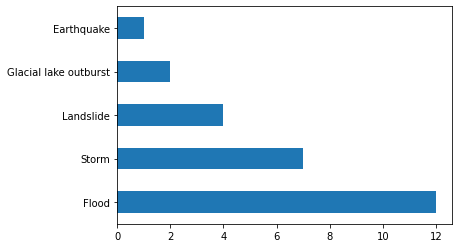

In [9]:
flood_events['Disaster Type'].value_counts().plot.barh()

<AxesSubplot:>

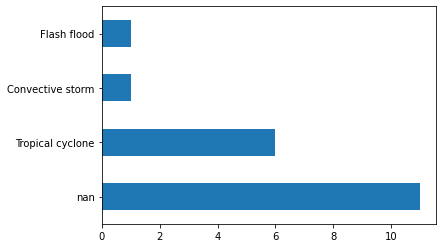

In [10]:
disaster_types = ['Storm', 'Flood']
flood_events = flood_events[flood_events['Disaster Type'].isin(disaster_types)]
#flood_events['Disaster Type'].value_counts()
flood_events['Disaster Subtype'].value_counts(dropna=False).plot.barh()

In [11]:
flood_events['Event Name'].unique()

array([nan, 'Cyclone Nivar', "Cyclone 'Amphan'", "Cyclone 'Nisarga'",
       "Tropical cyclone 'Tauktae'", "Cyclone 'Yaas'", "Cyclone 'Gulab'"],
      dtype=object)

In [12]:
flood_events[['Year', 'Event Name', 'Disaster Type', 'Location', 'Glide',
       'Start Month', 'Start Day', 'End Month', 'End Day', 'Total Damages (\'000 US$)']]

,Year,Event Name,Disaster Type,Location,Glide,Start Month,Start Day,End Month,End Day,Total Damages ('000 US$)
5148,2020,NaN,Flood,"Lakhimpur, Sontipur, Darrang, Goalpara (Assam ...",NaN,5,24,5,26,NaN
5149,2020,NaN,Flood,"Assam, Bihar, Gujarat, Chhattisgarh, Kerala, K...",NaN,6,NaN,8,16,7500000
5164,2020,Cyclone Nivar,Storm,Tamil Nadu and Puducherry,NaN,11,25,11,26,600000
5170,2020,NaN,Storm,Jammu & Kashmir state,NaN,1,11,1,14,NaN
5196,2020,Cyclone 'Amphan',Storm,"Balasore (Baleshwar) , Bhadrak, Kendrapada and...",TC-2020-00135,5,20,5,20,13500000
5197,2020,Cyclone 'Nisarga',Storm,"Raigad, Pune Districts (Maharashtra State)",NaN,6,3,6,3,820000
5198,2020,NaN,Flood,Uttar Pradesh State,NaN,5,10,5,13,10000
5199,2020,NaN,Flood,Jammu region,NaN,6,1,6,9,NaN
5200,2020,NaN,Flood,"Hyderabad, Telangana, Andhra Pradesh, Karnatak...",NaN,10,1,10,26,4000000
5266,2021,NaN,Flood,"Pune, Konkan, Raigada, Satara and Ratnagiri (M...",NaN,6,1,9,30,2000000


In [13]:
flood_events['supercost'] = flood_events['Total Damages (\'000 US$)'] > 1000000
flood_events = flood_events[flood_events['supercost']]

/tmp/ipykernel_23519/999217494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flood_events['supercost'] = flood_events['Total Damages (\'000 US$)'] > 1000000


In [14]:
flood_events['Year'] = flood_events['Year'].apply(int)
flood_events['Year'].value_counts().sort_index()

2020    3
2021    3
Name: Year, dtype: int64

In [15]:
flood_events[['Year', 'Event Name', 'Disaster Type', 'Location', 'Origin', 'Dis Mag Value',
       'Dis Mag Scale', 'Start Month', 'Start Day', 'End Month', 'End Day', 'Total Damages (\'000 US$)']]

,Year,Event Name,Disaster Type,Location,Origin,Dis Mag Value,Dis Mag Scale,Start Month,Start Day,End Month,End Day,Total Damages ('000 US$)
5149,2020,NaN,Flood,"Assam, Bihar, Gujarat, Chhattisgarh, Kerala, K...",Monsoon rain,NaN,Km2,6,NaN,8,16,7500000
5196,2020,Cyclone 'Amphan',Storm,"Balasore (Baleshwar) , Bhadrak, Kendrapada and...",NaN,185,Kph,5,20,5,20,13500000
5200,2020,NaN,Flood,"Hyderabad, Telangana, Andhra Pradesh, Karnatak...",Heavy rains,NaN,Km2,10,1,10,26,4000000
5266,2021,NaN,Flood,"Pune, Konkan, Raigada, Satara and Ratnagiri (M...",Monsoon rains,NaN,Km2,6,1,9,30,2000000
5311,2021,Tropical cyclone 'Tauktae',Storm,"Kerala, Karnataka, Goa, Maharashtra, Gujarat",NaN,222,Kph,5,14,5,19,1400000
5312,2021,Cyclone 'Yaas',Storm,"Bengale occidental, Odisha",NaN,155,Kph,5,27,5,27,3000000


## Rainfall data 

Using this source from the usg: https://catalog.data.gov/dataset/noaa-climate-data-record-cdr-of-precipitation-estimation-from-remotely-sensed-information-using

In [16]:
!pip install bs4

In [17]:
#!mkdir data/precip
# !rm data/precip/*

In [18]:
from bs4 import BeautifulSoup
import os
import requests as req
import numpy as np

url_base = 'https://www.ncei.noaa.gov/data/precipitation-persiann/access/'
years = [2020, 2021]
save_dir = 'data/precip'
event_idx = 0
in_event = False
event2url = dict()
flood_events.sort_values(['Start Year', 'Start Month', 'Start Day'], inplace=True)

def download_bfile(url, out_path):
    if not os.path.exists(out_path):
        ret = req.get(url, stream=True)
        with open(out_path, 'wb') as f:
            for d in ret.iter_content(1024):
                f.write(d) 

            
event = flood_events.iloc[event_idx]
print(event[['Start Year','Start Month', 'Start Day', 'End Month', 'End Day']])
for y in years:
    year_url = os.path.join(url_base, str(y))
    html = req.get(year_url).text
    bs = BeautifulSoup(html, 'html.parser')
    links = sorted([t.get('href') for t in bs.find_all('a')])
    for fname in links:
        
        if fname.startswith('PERSIANN'):
            date = fname.split('_')[2]
            
            year = int(date[:4])
            month = int(date[4:6])
            day = int(date[6:8])
            
            right_year = year == event['Start Year']
            right_month = month >= event['Start Month'] and month <= event['End Month']
            right_day = True
            if not (event['Start Day'] is np.nan):
                right_day = day >= event['Start Day'] and month <= event['End Day']
                
            print(date)
            if right_year and right_month and right_day:
                if not in_event:
                    event2url[event_idx] = []
                    in_event = True
                    print('Starting new event...')
                    print(event[['Location', 'Start Year','Start Month', 'Start Day', 'End Month', 'End Day']])
                data_url = os.path.join(year_url, fname)
                op = os.path.join(save_dir, fname)
                download_bfile(data_url, op)
                event2url[event_idx].append(op)
            else:
                if in_event:
                    in_event = False
                    event_idx += 1
                    event = flood_events.iloc[event_idx]
                    print('New Event')
                    print(event[['Location', 'Start Year','Start Month', 'Start Day', 'End Month', 'End Day']])

Start Year     2020
Start Month       5
Start Day        20
End Month         5
End Day          20
Name: 5196, dtype: object
20200101
20200102
20200103
20200104
20200105
20200106
20200107
20200108
20200109
20200110
20200111
20200112
20200113
20200114
20200115
20200116
20200117
20200118
20200119
20200120
20200121
20200122
20200123
20200124
20200125
20200126
20200127
20200128
20200129
20200130
20200131
20200201
20200202
20200203
20200204
20200205
20200206
20200207
20200208
20200209
20200210
20200211
20200212
20200213
20200214
20200215
20200216
20200217
20200218
20200219
20200220
20200221
20200222
20200223
20200224
20200225
20200226
20200227
20200228
20200229
20200301
20200302
20200303
20200304
20200305
20200306
20200307
20200308
20200309
20200310
20200311
20200312
20200313
20200314
20200315
20200316
20200317
20200318
20200319
20200320
20200321
20200322
20200323
20200324
20200325
20200326
20200327
20200328
20200329
20200330
20200331
20200401
20200402
20200403
20200404
20200405
20200406
2

In [19]:
flood_events[['Start Year','Start Month', 'Start Day', 'End Month', 'End Day']]

,Start Year,Start Month,Start Day,End Month,End Day
5196,2020,5,20,5,20
5149,2020,6,NaN,8,16
5200,2020,10,1,10,26
5311,2021,5,14,5,19
5312,2021,5,27,5,27
5266,2021,6,1,9,30


In [20]:
event2url

{0: ['data/precip/PERSIANN-CDR_v01r01_20200520_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200521_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200522_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200523_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200524_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200525_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200526_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200527_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200528_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200529_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200530_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200531_c20210208.nc'],
 1: ['data/precip/PERSIANN-CDR_v01r01_20200602_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200603_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200604_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200605_c20210208.nc',
  'data/precip/PERSIANN-CDR_v01r01_20200606_c2021

# Land Cover Data

## Looks like I need access to get it this way. Just signed up so we'll see. In the meantime let's try another way

In [2]:
!mkdir data/landcover

In [40]:
!pip install tqdm

In [45]:
import requests as req
from tqdm.notebook import tqdm

# found using this link: https://www.arcgis.com/apps/instant/media/index.html?appid=fc92d38533d440078f17678ebc20e8e2
url = 'https://ai4edataeuwest.blob.core.windows.net/io-lulc/io-lulc-model-001-v01-composite-v03-supercell-v02-clip-v01/45Q_20200101-20210101.tif'
savepath = 'data/landcover/westbengal_lulc.tif'

with open(savepath, 'wb') as f:

    ret = req.get(url, stream=True)
    for data in tqdm(ret.iter_content(1024),total=(362*(10**6)/ 1024.0)):
        f.write(data)

  0%|          | 0/353515.625 [00:00<?, ?it/s]

## Biophysical table

Got the CN Table from: https://www.geospatialworld.net/article/generation-of-curve-number-using-remote-sensing-and-geographic-information-system/

In [3]:
!sudo apt-get install curl

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version.
The following packages were automatically installed and are no longer required:
  acl at-spi2-core colord dconf-gsettings-backend dconf-service fontconfig
  fontconfig-config fonts-dejavu-core hicolor-icon-theme libatk-bridge2.0-0
  libatk1.0-0 libatk1.0-data libatspi2.0-0 libavahi-client3
  libavahi-common-data libavahi-common3 libcairo-gobject2 libcairo2 libcolord1
  libcolorhug1 libcups2 libdatrie1 libdconf1 libdrm-intel1 libdrm-nouveau2
  libdrm-radeon1 libexif12 libfontconfig1 libgbm1 libgd3 libgdk-pixbuf2.0-0
  libgdk-pixbuf2.0-common libgl1-mesa-dri libgphoto2-6 libgphoto2-l10n
  libgphoto2-port10 libgraphite2-3 libgtk-3-0 libgtk-3-bin libgtk-3-common
  libgudev-1.0-0 libgusb2 libharfbuzz0b libieee1284-3 libjasper1 libjbig0
  libjpeg-turbo8 libjpeg8 liblcms2-2 libllvm3.4 libltdl7 libnspr4 libnss3
  libnss3-nssdb libpango-1.0-0 libpangocairo-1.0-0 li

In [33]:
cn_table_str = """
Landuse, Subtype, Hydrologic Condition, SG A, SG B, SG C, SG D
Cultivated, Straight Row,,76,86,90,93
Cultivated,Contoured,Poor, 70, 79, 84, 88
Cultivated,Contoured,Good, 65, 75, 82, 86
Cultivated, Contoured and terraced, Poor, 66, 74, 80,82
Cultivated, Contoured and terraced, Good, 62, 71, 77, 81
Cultivated, Bunded, Poor, 67, 75,81,83
Cultivated, Bunded,Good, 59,69, 76, 79
Cultivated, Paddy (rice), ,95, 95, 95, 95
Orchards,With under stony cover,,39,53,67,71
Orchards, Without under stony cover, , 41, 55,69, 73
Forest, Dense, , 26, 40,58, 61
Forest, Open, , 28, 44, 60,64
Forest, Shrubs, , 33,47, 64, 67
Pasture, , Poor,68, 79, 86, 89
Pasture, , Fair, 49,69, 79,84
Pasture, , Fair, 39,61, 74,80
WastedLand,  , , 71, 80, 85, 88
Hard Surface, , , 77, 86, 91, 93
"""

with open('cn_table.csv', 'w') as f:
    f.write(cn_table_str)

In [34]:
pd.read_csv('cn_table.csv')

,Landuse,Subtype,Hydrologic Condition,SG A,SG B,SG C,SG D
0,Cultivated,Straight Row,NaN,76,86,90,93
1,Cultivated,Contoured,Poor,70,79,84,88
2,Cultivated,Contoured,Good,65,75,82,86
3,Cultivated,Contoured and terraced,Poor,66,74,80,82
4,Cultivated,Contoured and terraced,Good,62,71,77,81
5,Cultivated,Bunded,Poor,67,75,81,83
6,Cultivated,Bunded,Good,59,69,76,79
7,Cultivated,Paddy (rice),,95,95,95,95
8,Orchards,With under stony cover,NaN,39,53,67,71
9,Orchards,Without under stony cover,,41,55,69,73


## Soil Group Data

In [35]:
link = 'https://daac.ornl.gov/cgi-bin/download.pl?ds_id=1566&source=dsviewer'

In [37]:
!rm data/soil_data

In [38]:
!pwd

/home/siddharthsachdeva/landuse/notebooks
